# Orthopaedic Patients

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load in data
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m13/lesson_3/datasets/vertebral-column.csv')
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [3]:
# Drop the label to create the X data
X = df.drop('class', axis=1)
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [4]:
# Create the y set from the "Churn" column
y = df["class"]
y

0      Hernia
1      Hernia
2      Hernia
3      Hernia
4      Hernia
        ...  
305    Normal
306    Normal
307    Normal
308    Normal
309    Normal
Name: class, Length: 310, dtype: object

In [5]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Encode the y data with the label encoder
# Create an instance of the label encoder
le = LabelEncoder()

# Fit and transform the y training and testing data using the label encoder
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([2, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1,
       2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 2,
       2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2,
       1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 0,
       0, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0])

In [7]:
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.72369146,  0.15937768,  0.85406629,  0.79413535, -0.14528055,
        -0.03566156],
       [-1.46186841, -1.47565864, -1.1909458 , -0.77067305,  0.68984442,
        -0.67303548],
       [-1.66265795, -1.42419889, -1.02846226, -1.06013037,  0.84343398,
        -0.57232098],
       ...,
       [ 1.43497738,  1.57316498,  0.47475957,  0.66644314,  0.56836289,
         1.1714868 ],
       [ 0.22099283,  0.26391439, -0.62397904,  0.08700144, -0.46512549,
        -0.93437795],
       [-1.40725584,  0.21095842, -1.65866307, -1.92054188,  1.54337892,
        -0.66816724]])

In [8]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.42191744,  0.01026244,  0.43676412,  0.52270102, -0.62449239,
         0.15604031],
       [ 0.16889247,  1.00282328, -0.01688838, -0.51227997, -0.34689756,
        -0.47819263],
       [ 1.80962609,  0.71909755,  1.73698902,  1.75418366, -0.11701088,
         0.63608177],
       [ 0.71889495,  0.00448308,  0.00409441,  0.90001149,  0.03774876,
         0.13016797],
       [-0.30900949, -0.52624871, -0.58026125, -0.00806747, -0.08949282,
         0.3342101 ],
       [ 0.59421259, -0.38831028,  0.49282824,  1.02712647, -1.34554857,
        -0.03185924],
       [-1.51465681, -1.23063944, -0.81181309, -1.0140113 ,  0.42768035,
        -0.66658298],
       [ 0.68966727,  0.73841613,  1.48485251,  0.33306305, -0.94877989,
         0.72987133],
       [ 1.43640935,  1.2309483 ,  1.66962463,  0.91547472,  0.67122728,
         1.09720131],
       [ 0.53649822,  0.15629666,  1.27726524,  0.56116365, -1.24337687,
        -0.67261049],
       [ 0.31804002,  0.58162623,  0.56625407, -0.

## Model and Fit to a Logistic Regression Classifier

In [9]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train_encoded)

LogisticRegression()

In [10]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8577586206896551
Testing Data Score: 0.8461538461538461


## Model and Fit to a Support Vector Machine

In [11]:
# Create the support vector machine classifier model with a 'rbf' kernel
svm_model = SVC(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train_encoded)

SVC(kernel='linear')

In [12]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.875
Testing Data Score: 0.8846153846153846


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.731
k: 3, Train/Test Score: 0.888/0.705
k: 5, Train/Test Score: 0.866/0.692
k: 7, Train/Test Score: 0.841/0.731
k: 9, Train/Test Score: 0.832/0.744
k: 11, Train/Test Score: 0.828/0.731
k: 13, Train/Test Score: 0.832/0.718
k: 15, Train/Test Score: 0.832/0.718
k: 17, Train/Test Score: 0.836/0.718
k: 19, Train/Test Score: 0.823/0.744


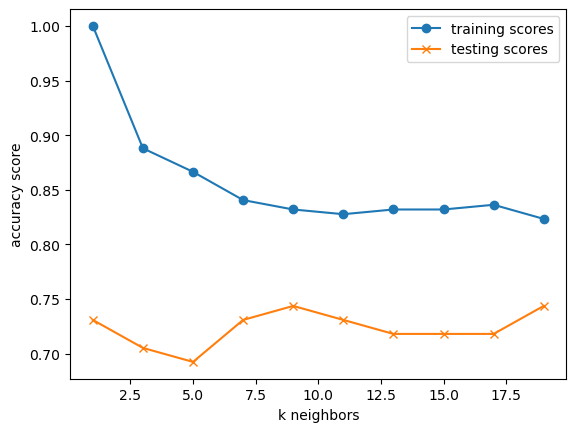

In [13]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_encoded)
    train_score = knn.score(X_train_scaled, y_train_encoded)
    test_score = knn.score(X_test_scaled, y_test_encoded)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [14]:
# Create the KNN model with 9 neighbors
knn_model = KNeighborsClassifier(n_neighbors=9)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(n_neighbors=9)

In [15]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.8318965517241379
Testing Data Score: 0.7435897435897436


## Model and Fit to a Decision Tree Classifier

In [16]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier()

In [17]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.7051282051282052


## Model and Fit to a Random Forest Classifier

In [18]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(n_estimators=128, random_state=1)

In [19]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 1.0
Testing Data Score: 0.8461538461538461
